In [1]:
import json
import networkx as nx
from networkx import json_graph

import pandas as pd
from pandas.plotting import table
import numpy as np
import time
import re

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
%matplotlib inline

In [2]:
# getting lines from the json file
lines = open("dataset/dataset.json",'r').readlines()

# getting the size of data
data_size = len(lines)
print("data size = ", data_size)

data size =  14397


In [3]:
# creating lists of number of nodes, edges, connected components
# and simple cycles for each CGF graph

n_nodes = []
n_edges = []
n_conncomps = []
n_cycles = []

for item in lines:
    d = json.loads(item)
    nx_graph = json_graph.adjacency_graph(d['cfg'])
    name, type, nodes, edges, a_in, a_out = nx.info(nx_graph).split("\n",6)
    n_nodes.append(int(nodes.split(": ")[1]))
    n_edges.append(int(edges.split(": ")[1]))
    u_graph = nx_graph.to_undirected()
    n_conncomps.append(nx.number_connected_components(u_graph))
    n_cycles.append(len(nx.cycle_basis(u_graph)))

In [4]:
# computing the cyclomatic complexity for each item

cycl_complex = []
for i in range(data_size):
    cycl_complex.append(n_edges[i]-n_nodes[i]+2*n_conncomps[i])

In [5]:
# getting the lists of labels and asm_lists
labels = []
asm_lists = []

for item in lines:
    d = json.loads(item)
    values = list(d.values())
    labels.append(values[1])
    asm_lists.append(values[2])

In [6]:
n_memory_ins = [0]*data_size
n_arithmetic_ins = [0]*data_size
n_float_ins = [0]*data_size
n_bitwise_ins = [0]*data_size
n_jumps = [0]*data_size
n_comparisons = [0]*data_size
n_calls = [0]*data_size

for i in range(data_size):
    asm = asm_lists[i]
    
    n_memory_ins[i] += len(re.findall('mov', asm))
    n_memory_ins[i] += len(re.findall('push', asm))
    n_memory_ins[i] += len(re.findall('pop', asm))
    n_memory_ins[i] += len(re.findall('cwtl', asm))
    n_memory_ins[i] += len(re.findall('cltq', asm))
    n_memory_ins[i] += len(re.findall('cqto', asm))

    n_arithmetic_ins[i] += len(re.findall('lea', asm))
    n_arithmetic_ins[i] += len(re.findall('inc', asm))
    n_arithmetic_ins[i] += len(re.findall('dec', asm))
    n_arithmetic_ins[i] += len(re.findall('neg', asm))
    n_arithmetic_ins[i] += len(re.findall('add', asm))
    n_arithmetic_ins[i] += len(re.findall('sub', asm))
    n_arithmetic_ins[i] += len(re.findall('imul', asm))
    n_arithmetic_ins[i] += len(re.findall('div', asm))


    n_bitwise_ins[i] += len(re.findall('not', asm))
    n_bitwise_ins[i] += len(re.findall('xor', asm))
    n_bitwise_ins[i] += len(re.findall('or', asm))
    n_bitwise_ins[i] += len(re.findall('and', asm))
    n_bitwise_ins[i] += len(re.findall('sal', asm))
    n_bitwise_ins[i] += len(re.findall('sar', asm))
    n_bitwise_ins[i] += len(re.findall('shr', asm))

    n_float_ins[i] += len(re.findall('xmm', asm))
    n_float_ins[i] += len(re.findall('movs', asm))
    n_float_ins[i] += len(re.findall('cvtss2sd', asm))
    n_float_ins[i] += len(re.findall('cvtsd2ss', asm))
    n_float_ins[i] += len(re.findall('cvtsi2s', asm))
    n_float_ins[i] += len(re.findall('cvtsi2s', asm))
    n_float_ins[i] += len(re.findall('cvtts', asm))
    n_float_ins[i] += len(re.findall('adds', asm))
    n_float_ins[i] += len(re.findall('subs', asm))
    n_float_ins[i] += len(re.findall('muls', asm))
    n_float_ins[i] += len(re.findall('divs', asm))
    n_float_ins[i] += len(re.findall('maxs', asm))
    n_float_ins[i] += len(re.findall('mins', asm))
    n_float_ins[i] += len(re.findall('sqrts', asm))
    n_float_ins[i] += len(re.findall('ucomis', asm))

    n_jumps[i] += len(re.findall('j', asm))
    
    n_calls[i] += len(re.findall('call', asm))

    n_comparisons[i] += len(re.findall('cmp', asm))
    n_comparisons[i] += len(re.findall('test', asm))
    n_comparisons[i] += len(re.findall('set', asm))

In [7]:
data = {'n_nodes': n_nodes,
       'cyclomatic_complexity' : cycl_complex,
       'n_cycles' : n_cycles,
       'n_memory_ins': n_memory_ins,
       'n_arithmetic_ins' : n_arithmetic_ins,
       'n_float_ins' : n_float_ins,
       'n_bitwise_ins' : n_bitwise_ins,
       'n_jumps' : n_jumps,
       'n_comparisons' : n_comparisons,
       'n_calls' : n_calls,
       'label': labels}

df = pd.DataFrame (data, columns = ['n_nodes', 'cyclomatic_complexity', 'n_cycles', 'n_memory_ins', 
                                    'n_arithmetic_ins', 'n_float_ins', 'n_bitwise_ins', 
                                    'n_jumps', 'n_comparisons', 'n_calls', 'label'])

In [8]:
df.head(10)

,n_nodes,cyclomatic_complexity,n_cycles,n_memory_ins,n_arithmetic_ins,n_float_ins,n_bitwise_ins,n_jumps,n_comparisons,n_calls,label
0,23,9,8,54,5,4,54,15,8,6,string
1,15,7,6,10,6,52,13,12,4,1,math
2,18,17,16,188,65,17,247,16,17,0,encryption
3,2,1,0,7,1,6,5,1,1,1,math
4,22,15,11,22,10,3,32,14,10,7,sort
5,35,29,28,118,2,0,249,1,1,30,encryption
6,21,21,20,167,90,93,156,20,8,0,encryption
7,3,3,2,63,2,0,127,2,2,0,encryption
8,15,13,12,61,25,1,36,14,20,0,sort
9,14,4,3,37,6,1,34,5,1,7,string


<AxesSubplot:title={'center':'Number of nodes'}, xlabel='label'>

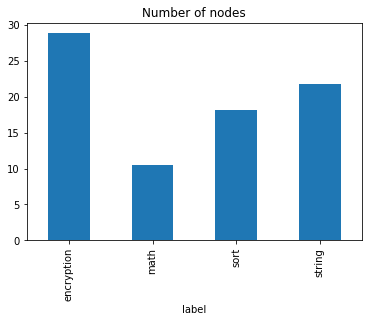

In [9]:
df.groupby('label')['n_nodes'].mean().plot(kind='bar', title='Number of nodes')

<AxesSubplot:title={'center':'Cyclomatic complexity'}, xlabel='label'>

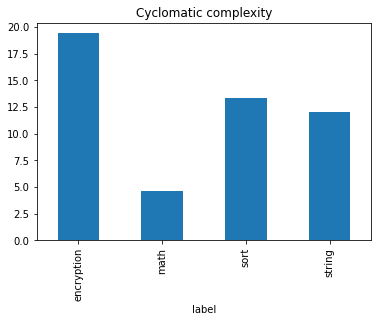

In [10]:
df.groupby('label')['cyclomatic_complexity'].mean().plot(kind='bar',title='Cyclomatic complexity')

<AxesSubplot:title={'center':'Number of cycles'}, xlabel='label'>

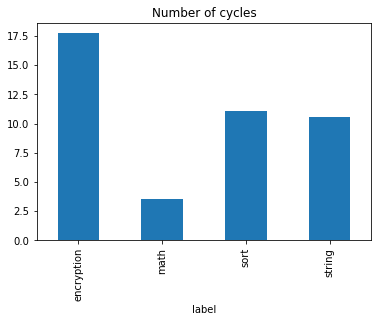

In [11]:
df.groupby('label')['n_cycles'].mean().plot(kind='bar', title='Number of cycles')

<AxesSubplot:title={'center':'Number of memory instructions'}, xlabel='label'>

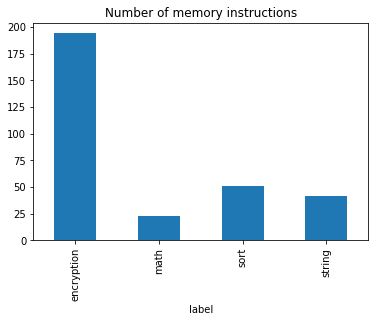

In [12]:
df.groupby('label')['n_memory_ins'].mean().plot(kind='bar', title='Number of memory instructions')

<AxesSubplot:title={'center':'Number of arithmetic instructions'}, xlabel='label'>

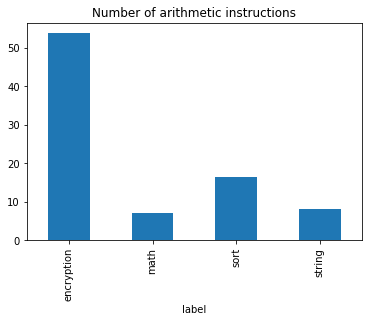

In [13]:
df.groupby('label')['n_arithmetic_ins'].mean().plot(kind='bar', title='Number of arithmetic instructions')

<AxesSubplot:title={'center':'Number of floating point instructions'}, xlabel='label'>

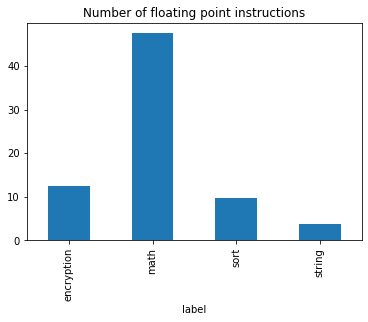

In [14]:
df.groupby('label')['n_float_ins'].mean().plot(kind='bar', title='Number of floating point instructions')

<AxesSubplot:title={'center':'Number of bitwise instructions'}, xlabel='label'>

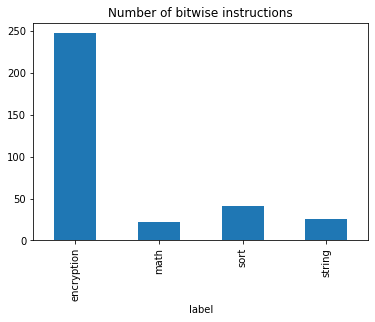

In [15]:
df.groupby('label')['n_bitwise_ins'].mean().plot(kind='bar', title='Number of bitwise instructions')

<AxesSubplot:title={'center':'Number of jumps'}, xlabel='label'>

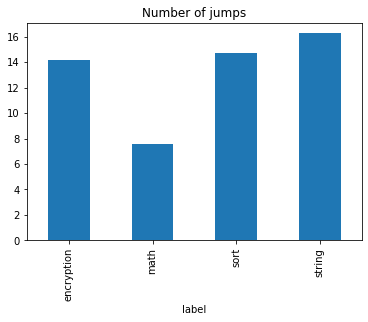

In [16]:
df.groupby('label')['n_jumps'].mean().plot(kind='bar',title='Number of jumps')

<AxesSubplot:title={'center':'Number of comparisons'}, xlabel='label'>

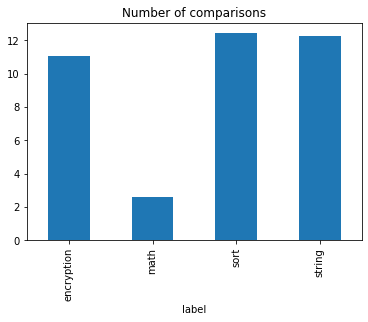

In [17]:
df.groupby('label')['n_comparisons'].mean().plot(kind='bar', title='Number of comparisons')

<AxesSubplot:title={'center':'Number of calls'}, xlabel='label'>

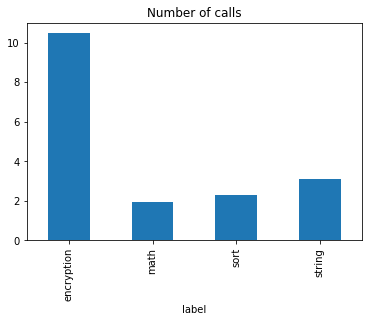

In [18]:
df.groupby('label')['n_calls'].mean().plot(kind='bar', title='Number of calls')

In [19]:
df.to_pickle('dataframe.plk')